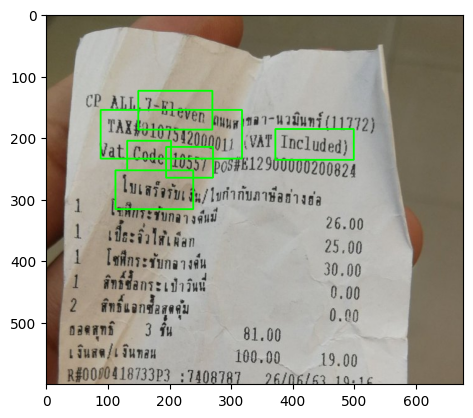

In [21]:
# https://f.ptcdn.info/617/045/000/ocry4h3xsDvXLhR6EmN-o.jpg

from typing import Any, Dict
import numpy as np
import cv2
from utils import load_model, download_image, generate_line_list
from utils.detect import detect_pipeline
import matplotlib.pyplot as plt
from llm.convert import convert_text_to_json
import easyocr

name = "/home/monshinawatra/works/payment-extraction/query_image_20240415230029.jpg"
# reader, model, processor, device = load_model()
# images_list, dataframe = detect_pipeline(reader, name)
reader = easyocr.Reader(["en", 'th'])

im = cv2.imread(name)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = im[:600, :, :]
# Detect text from image
result = reader.detect(im)
points = [point for point in result[0][0]]

rotate_points = []
for rotate_box in result[1][0]:
    rotate_box = np.array(rotate_box).reshape(4, 2).astype(np.int32)
    x, y, w, h = cv2.boundingRect(rotate_box)

    rotate_points.append((x, x + w, y, y + h))

# points.extend(rotate_points)
points = rotate_points
for point in points:
    cv2.rectangle(im, (point[0], point[2]), (point[1], point[3]), (0, 255, 0), 2)
# image = cv2.imread(name)

# for idx, row in dataframe.iterrows():
#     x1, y1, x2, y2 = row["x1"], row["y1"], row["x2"], row["y2"]
#     cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
# # texts = []

# # for img in images_list:
# #     pixels_value = processor(img, return_tensors="pt").pixel_values
# #     outputs = model.generate(pixels_value.to("cuda"))
# #     generated_text = processor.tokenizer.batch_decode(outputs, skip_special_tokens=True)[0]
# #     texts.append(generated_text)

# # dataframe["text"] = texts

# line_list = generate_line_list(dataframe)
# plain_text = "\n".join(line_list)

# with open("output.txt", "w") as f:
#     f.write(plain_text)

plt.imshow(im)
plt.show()

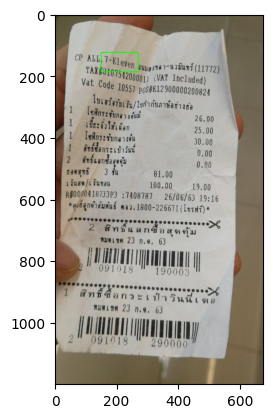

In [14]:
import cv2
import numpy as np

rotate_box = result[1][0][0]
rotate_box = np.array(rotate_box).reshape(4, 2).astype(np.int32)

# Convert to x, y, w, h

# Draw rectangle
cv2.rectangle(im, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(im)
plt.show()